This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [10]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.6301 - accuracy: 0.8080 - val_loss: 0.2761 - val_accuracy: 0.9157
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2651 - accuracy: 0.9188 - val_loss: 0.1911 - val_accuracy: 0.9423
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1739 - accuracy: 0.9464 - val_loss: 0.1887 - val_accuracy: 0.9442
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1241 - accuracy: 0.9618 - val_loss: 0.1474 - val_accuracy: 0.9546
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0900 - accuracy: 0.9720 - val_loss: 0.1381 - val_accuracy: 0.9609
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0675 - accuracy: 0.9785 - val_loss: 0.1419 - val_accuracy: 0.9578
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0496 - accuracy: 0.9843 - val_loss: 0.1384 - val_accuracy: 0.9629
Epoch 

**Plotting a validation accuracy comparison**

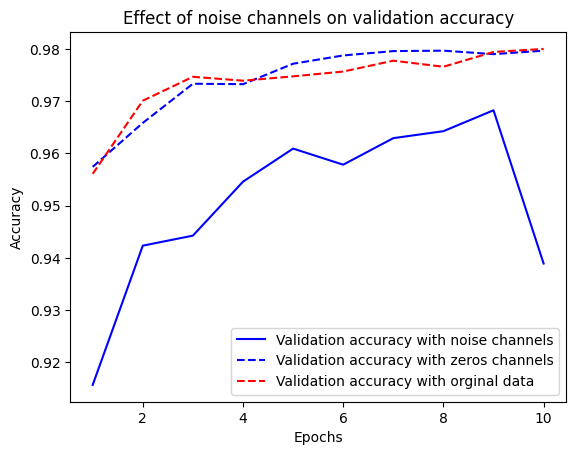

In [14]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with orginal data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [36]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3141 - accuracy: 0.1044 - val_loss: 2.3055 - val_accuracy: 0.1037
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2988 - accuracy: 0.1159 - val_loss: 2.3124 - val_accuracy: 0.1030
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2907 - accuracy: 0.1281 - val_loss: 2.3167 - val_accuracy: 0.1089
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2794 - accuracy: 0.1395 - val_loss: 2.3307 - val_accuracy: 0.1050
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2654 - accuracy: 0.1497 - val_loss: 2.3341 - val_accuracy: 0.1053
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2453 - accuracy: 0.1645 - val_loss: 2.3504 - val_accuracy: 0.1004
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2245 - accuracy: 0.1762 - val_loss: 2.3621 - val_accuracy: 0.1059

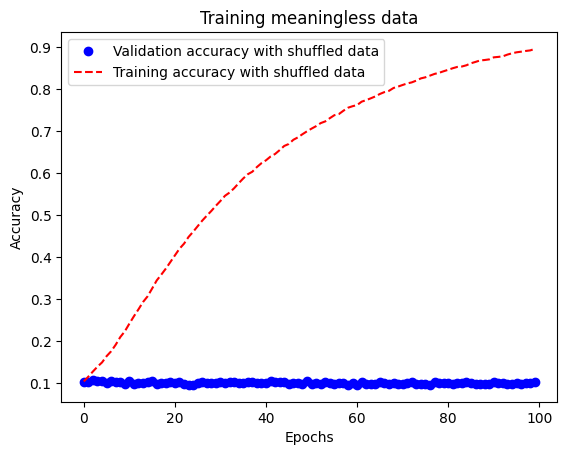

In [38]:
import matplotlib.pyplot as plt
val_accuracy = history.history["val_accuracy"]
train_accuracy = history.history["accuracy"]
epochs = range(0, len(train_accuracy))
plt.plot(epochs, val_accuracy, "bo",
         label="Validation accuracy with shuffled data")
plt.plot(epochs, train_accuracy, "r--",
         label="Training accuracy with shuffled data")
plt.title("Training meaningless data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [39]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 712.2477 - accuracy: 0.3265 - val_loss: 2.6107 - val_accuracy: 0.1782
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5008 - accuracy: 0.1981 - val_loss: 2.2839 - val_accuracy: 0.2047
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4621 - accuracy: 0.1882 - val_loss: 2.2348 - val_accuracy: 0.1954
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 2.6305 - accuracy: 0.1913 - val_loss: 2.2243 - val_accuracy: 0.1966
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 2.2988 - accuracy: 0.1745 - val_loss: 2.2734 - val_accuracy: 0.1925
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3715 - accuracy: 0.1829 - val_loss: 2.3544 - val_accuracy: 0.1918
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3623 - accuracy: 0.1881 - val_loss: 2.2997 - val_accuracy: 0.1678
Epoc

**The same model with a more appropriate learning rate**

In [40]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3730 - accuracy: 0.9087 - val_loss: 0.1318 - val_accuracy: 0.9613
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1252 - accuracy: 0.9650 - val_loss: 0.1312 - val_accuracy: 0.9672
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0968 - accuracy: 0.9742 - val_loss: 0.1415 - val_accuracy: 0.9700
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0845 - accuracy: 0.9791 - val_loss: 0.1645 - val_accuracy: 0.9673
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0707 - accuracy: 0.9826 - val_loss: 0.1911 - val_accuracy: 0.9686
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0644 - accuracy: 0.9846 - val_loss: 0.1709 - val_accuracy: 0.9737
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0557 - accuracy: 0.9867 - val_loss: 0.2056 - val_accuracy: 0.9702
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [41]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6700 - accuracy: 0.8326 - val_loss: 0.3602 - val_accuracy: 0.9022
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.9025 - val_loss: 0.3096 - val_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3171 - accuracy: 0.9115 - val_loss: 0.2931 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.9159 - val_loss: 0.2843 - val_accuracy: 0.9206
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2918 - accuracy: 0.9194 - val_loss: 0.2784 - val_accuracy: 0.9223
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2853 - accuracy: 0.9203 - val_loss: 0.2749 - val_accuracy: 0.9235
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2802 - accuracy: 0.9216 - val_loss: 0.2726 - val_accuracy: 0.9240
Epoch 

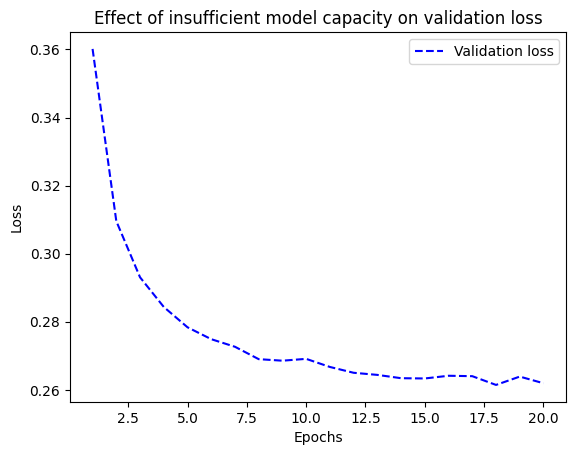

In [42]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [43]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3652 - accuracy: 0.8965 - val_loss: 0.1919 - val_accuracy: 0.9457
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1662 - accuracy: 0.9508 - val_loss: 0.1318 - val_accuracy: 0.9617
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1168 - accuracy: 0.9653 - val_loss: 0.1096 - val_accuracy: 0.9684
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0911 - accuracy: 0.9726 - val_loss: 0.1068 - val_accuracy: 0.9687
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0723 - accuracy: 0.9784 - val_loss: 0.0957 - val_accuracy: 0.9721
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0609 - accuracy: 0.9812 - val_loss: 0.0943 - val_accuracy: 0.9728
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0510 - accuracy: 0.9836 - val_loss: 0.1010 - val_accuracy: 0.9699
Epoch 

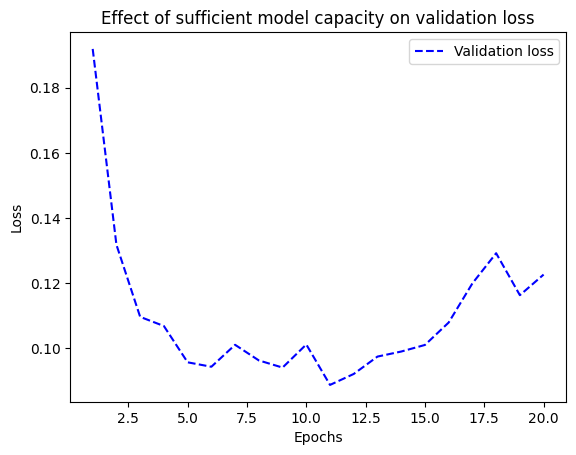

In [44]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of sufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [45]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5306 - accuracy: 0.7721 - val_loss: 0.3951 - val_accuracy: 0.8628
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3225 - accuracy: 0.8895 - val_loss: 0.3146 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2373 - accuracy: 0.9201 - val_loss: 0.2868 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1918 - accuracy: 0.9364 - val_loss: 0.2791 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1587 - accuracy: 0.9467 - val_loss: 0.2792 - val_accuracy: 0.8885
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1345 - accuracy: 0.9560 - val_loss: 0.3402 - val_accuracy: 0.8712
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1156 - accuracy: 0.9640 - val_loss: 0.3179 - val_accuracy: 0.8793
Epoch 8/20
30

**Version of the model with lower capacity**

In [46]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6407 - accuracy: 0.6513 - val_loss: 0.5986 - val_accuracy: 0.7717
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5635 - accuracy: 0.7652 - val_loss: 0.5589 - val_accuracy: 0.7251
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5193 - accuracy: 0.8145 - val_loss: 0.5263 - val_accuracy: 0.8375
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4870 - accuracy: 0.8511 - val_loss: 0.5066 - val_accuracy: 0.8121
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4605 - accuracy: 0.8733 - val_loss: 0.4902 - val_accuracy: 0.8317
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4380 - accuracy: 0.8912 - val_loss: 0.4746 - val_accuracy: 0.8627
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4185 - accuracy: 0.9059 - val_loss: 0.4688 - val_accuracy: 0.8484
Epoch 8/20
30

**Version of the model with higher capacity**

In [47]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5642 - accuracy: 0.7234 - val_loss: 0.5348 - val_accuracy: 0.7467
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3344 - accuracy: 0.8629 - val_loss: 0.3081 - val_accuracy: 0.8718
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2368 - accuracy: 0.9049 - val_loss: 0.3218 - val_accuracy: 0.8624
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1913 - accuracy: 0.9264 - val_loss: 0.2712 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1380 - accuracy: 0.9481 - val_loss: 0.2867 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1011 - accuracy: 0.9644 - val_loss: 0.3649 - val_accuracy: 0.8722
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0748 - accuracy: 0.9767 - val_loss: 0.3583 - val_accuracy: 0.8839
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [48]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.6026 - accuracy: 0.7741 - val_loss: 0.4704 - val_accuracy: 0.8615
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.3996 - accuracy: 0.8927 - val_loss: 0.3954 - val_accuracy: 0.8758
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3272 - accuracy: 0.9138 - val_loss: 0.3583 - val_accuracy: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2919 - accuracy: 0.9243 - val_loss: 0.3752 - val_accuracy: 0.8739
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2721 - accuracy: 0.9317 - val_loss: 0.3548 - val_accuracy: 0.8842
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2517 - accuracy: 0.9407 - val_loss: 0.3504 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2368 - accuracy: 0.9449 - val_loss: 0.3547 - val_accuracy: 0.8854
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [49]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [50]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 81ms/step - loss: 0.6385 - accuracy: 0.6357 - val_loss: 0.5403 - val_accuracy: 0.8168
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5357 - accuracy: 0.7537 - val_loss: 0.4503 - val_accuracy: 0.8589
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4626 - accuracy: 0.8122 - val_loss: 0.3895 - val_accuracy: 0.8666
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4069 - accuracy: 0.8493 - val_loss: 0.3329 - val_accuracy: 0.8790
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3569 - accuracy: 0.8740 - val_loss: 0.3110 - val_accuracy: 0.8801
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3155 - accuracy: 0.8917 - val_loss: 0.2937 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2822 - accuracy: 0.9067 - val_loss: 0.2759 - val_accuracy: 0.8909
Epoch 8/20
30

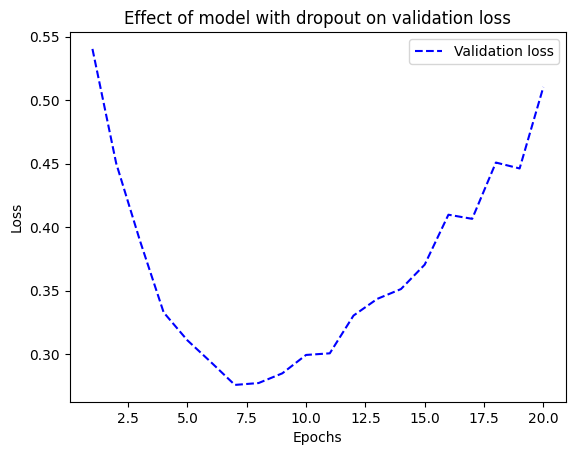

In [51]:
import matplotlib.pyplot as plt
val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of model with dropout on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Summary